### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Матюхин Григорий Васильевич
##### Группа: НПИбд-01-21

## Москва 2024
***

### Вариант №26 

- Parkinsons Disease Data Set 
  - Название файла: parkinsons.data 
  - Ссылка: http://archive.ics.uci.edu/ml/datasets/Parkinsons 
- Класс: status (столбец No 18) 
- Зависимая переменная: MDVP:Flo(Hz) (столбец No 4) 
- Метод обработки пропущенных значений – среднее значение класса 
- Метод обработки выбросов – стандартизованная оценка (Z-score) 
- Метод снижения размерности данных – регрессия лассо (Lasso) 
- Регрессоры: 
  - Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 
  - регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5  
  - регрессии на основе метода ближайших соседей (KNeighborsRegressor), параметр n_neighbors в диапазоне от 1 до 5 
- Показатели качества регрессии: 
  - Для определения лучшего регрессора MAPE 
  - Для визуализации кривой обучения MSLE 

## 1. Загружаем датасет

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons = fetch_ucirepo(id=174)

In [2]:
import pandas as pd

In [3]:
parkinsons.keys()

dict_keys(['data', 'metadata', 'variables'])

In [4]:
parkinsons.variables

,name,role,type,demographic,description,units,missing_values
0,name,ID,Categorical,None,None,None,no
1,MDVP:Fo,Feature,Continuous,None,None,Hz,no
2,MDVP:Fhi,Feature,Continuous,None,None,Hz,no
3,MDVP:Flo,Feature,Continuous,None,None,Hz,no
4,MDVP:Jitter,Feature,Continuous,None,None,%,no
5,MDVP:Jitter,Feature,Continuous,None,None,Abs,no
6,MDVP:RAP,Feature,Continuous,None,None,None,no
7,MDVP:PPQ,Feature,Continuous,None,None,None,no
8,Jitter:DDP,Feature,Continuous,None,None,None,no
9,MDVP:Shimmer,Feature,Continuous,None,None,None,no


In [5]:
parkinsons.data.features

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
parkinsons.data.targets

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [7]:
data = parkinsons.data

## 2. Предобработка данных

In [8]:
parkinsons.variables

,name,role,type,demographic,description,units,missing_values
0,name,ID,Categorical,None,None,None,no
1,MDVP:Fo,Feature,Continuous,None,None,Hz,no
2,MDVP:Fhi,Feature,Continuous,None,None,Hz,no
3,MDVP:Flo,Feature,Continuous,None,None,Hz,no
4,MDVP:Jitter,Feature,Continuous,None,None,%,no
5,MDVP:Jitter,Feature,Continuous,None,None,Abs,no
6,MDVP:RAP,Feature,Continuous,None,None,None,no
7,MDVP:PPQ,Feature,Continuous,None,None,None,no
8,Jitter:DDP,Feature,Continuous,None,None,None,no
9,MDVP:Shimmer,Feature,Continuous,None,None,None,no


Нет пропущенных значений

In [9]:
data.features = data.features.apply(pd.to_numeric)

In [10]:
CLS = "status"

In [11]:
D = data.features
D[CLS] = data.targets
D = D.loc[:,~D.columns.duplicated()].copy()
D

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00370,0.00554,0.01109,0.04374,0.02182,0.03130,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00465,0.00696,0.01394,0.06134,0.03134,0.04518,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00544,0.00781,0.01633,0.05233,0.02757,0.03858,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00502,0.00698,0.01505,0.05492,0.02924,0.04005,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00655,0.00908,0.01966,0.06425,0.03490,0.04825,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00263,0.00259,0.00790,0.04087,0.02336,0.02498,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00331,0.00292,0.00994,0.02751,0.01604,0.01657,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00624,0.00564,0.01873,0.02308,0.01268,0.01365,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00370,0.00390,0.01109,0.02296,0.01265,0.01321,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


## 3. Удаление выбросов

<Axes: >

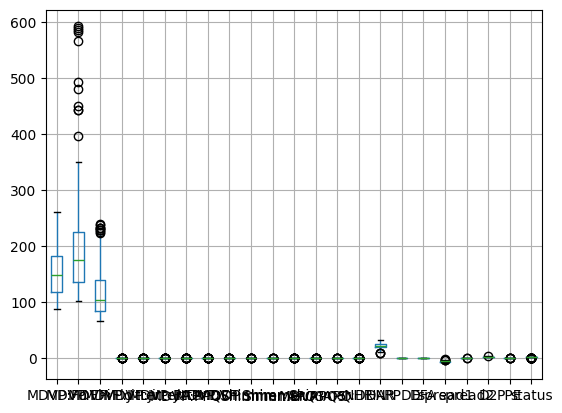

In [12]:
%matplotlib inline
data.features.boxplot()

In [13]:
import numpy as np

Reduced from 195 to 140


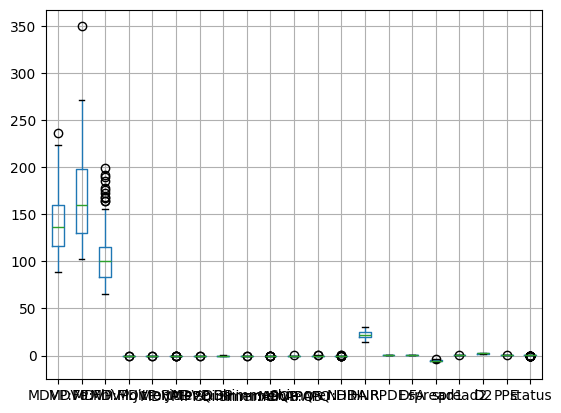

In [14]:
from scipy import stats

before = D.shape[0]

D = D[(np.abs(stats.zscore(D)) < 2).all(axis=1)]
D.boxplot()

after = D.shape[0]

print(f"Reduced from {before} to {after}")

## 4. Масштабирование

In [15]:
TO_LEAVE = ["MDVP:Flo"]
for col_name, col in D.items():
    if col.nunique() < 50 and col_name not in TO_LEAVE + [CLS]:
        D = D.drop(col_name, axis=1)
D

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00370,0.00554,0.01109,0.04374,0.02182,0.03130,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
2,116.682,131.111,111.555,0.01050,0.00544,0.00781,0.01633,0.05233,0.02757,0.03858,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00502,0.00698,0.01505,0.05492,0.02924,0.04005,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
5,120.552,131.162,113.787,0.00968,0.00463,0.00750,0.01388,0.04701,0.02328,0.03526,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,120.267,137.244,114.820,0.00333,0.00155,0.00202,0.00466,0.01608,0.00779,0.00937,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,114.563,119.167,86.647,0.00327,0.00146,0.00184,0.00439,0.01185,0.00557,0.00721,...,0.01672,0.00703,24.775,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777,0
189,201.774,262.707,78.228,0.00694,0.00412,0.00396,0.01235,0.02574,0.01454,0.01582,...,0.04363,0.04441,19.368,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838,0
190,174.188,230.978,94.261,0.00459,0.00263,0.00259,0.00790,0.04087,0.02336,0.02498,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00331,0.00292,0.00994,0.02751,0.01604,0.01657,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0


In [16]:
for col in D.drop(CLS, axis=1):
    colD = D[col]
    D.loc[:, col] = (colD - colD.min()) / (colD.max() - colD.min())
D

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.214105,0.223205,0.071295,0.509091,0.398417,0.670537,0.397977,0.683663,0.595107,0.745269,...,0.595107,0.196195,0.445276,0.303647,0.950371,0.673454,0.619891,0.408437,0.682125,1
2,0.191720,0.117217,0.345047,0.728926,0.627968,1.000000,0.628408,0.858862,0.793246,0.957205,...,0.793246,0.106817,0.421453,0.342569,1.000000,0.771699,0.756314,0.438336,0.846519,1
3,0.191679,0.144573,0.343632,0.685124,0.572559,0.879536,0.572120,0.911687,0.850793,1.000000,...,0.850793,0.111177,0.421017,0.355638,0.969969,0.858210,0.826445,0.484702,0.971034,1
5,0.217892,0.117424,0.361761,0.661157,0.521108,0.955007,0.520668,0.750357,0.645417,0.860553,...,0.645647,0.098197,0.466791,0.305659,0.998913,0.824909,0.719494,0.325016,0.932659,1
6,0.215964,0.142036,0.369496,0.136364,0.114776,0.159652,0.115215,0.119519,0.111647,0.106841,...,0.111762,0.037257,0.685563,0.770488,0.696483,0.455291,0.593028,0.081250,0.432355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.177389,0.068883,0.158532,0.131405,0.102902,0.133527,0.103342,0.033245,0.035148,0.043959,...,0.035378,0.046770,0.678640,0.665567,0.175638,0.169496,0.263384,0.124619,0.124059,0
189,0.767183,0.649749,0.095489,0.434711,0.453826,0.441219,0.453386,0.316541,0.344245,0.294614,...,0.344475,0.417162,0.341441,0.544968,0.297831,0.109926,0.294508,0.419355,0.093432,0
190,0.580623,0.521350,0.215547,0.240496,0.257256,0.242380,0.257696,0.625127,0.648174,0.561281,...,0.648289,0.250991,0.350733,0.390331,0.169520,0.215088,0.178699,0.669241,0.162684,0
191,0.819541,0.610536,0.179806,0.327273,0.346966,0.290276,0.347405,0.352641,0.395934,0.316448,...,0.396049,0.156461,0.327658,0.347151,0.295266,0.306269,0.201139,0.762151,0.285500,0


In [17]:
from sklearn.linear_model import Lasso

X = D.drop(CLS, axis=1)
y = D[CLS]

lasso = Lasso()
lasso.fit(X, y)
coeffs = list(zip(lasso.coef_, X.keys()))
coeffs

[(np.float64(-0.0), 'MDVP:Fo'),
 (np.float64(-0.0), 'MDVP:Fhi'),
 (np.float64(0.0), 'MDVP:Flo'),
 (np.float64(0.0), 'MDVP:Jitter'),
 (np.float64(0.0), 'MDVP:RAP'),
 (np.float64(0.0), 'MDVP:PPQ'),
 (np.float64(0.0), 'Jitter:DDP'),
 (np.float64(0.0), 'MDVP:Shimmer'),
 (np.float64(0.0), 'Shimmer:APQ3'),
 (np.float64(0.0), 'Shimmer:APQ5'),
 (np.float64(0.0), 'MDVP:APQ'),
 (np.float64(0.0), 'Shimmer:DDA'),
 (np.float64(0.0), 'NHR'),
 (np.float64(-0.0), 'HNR'),
 (np.float64(0.0), 'RPDE'),
 (np.float64(0.0), 'DFA'),
 (np.float64(0.0), 'spread1'),
 (np.float64(0.0), 'spread2'),
 (np.float64(0.0), 'D2'),
 (np.float64(0.0), 'PPE')]

In [18]:
FEATS = TO_LEAVE + list(map(lambda x: x[1], sorted(coeffs)[:(3 - len(TO_LEAVE))]))
FEATS

['MDVP:Flo', 'D2', 'DFA']

In [19]:
D = D[FEATS + [CLS]]
D

,MDVP:Flo,D2,DFA,status
0,0.071295,0.408437,0.950371,1
2,0.345047,0.438336,1.000000,1
3,0.343632,0.484702,0.969969,1
5,0.361761,0.325016,0.998913,1
6,0.369496,0.081250,0.696483,1
...,...,...,...,...
188,0.158532,0.124619,0.175638,0
189,0.095489,0.419355,0.297831,0
190,0.215547,0.669241,0.169520,0
191,0.179806,0.762151,0.295266,0


## 5. Визуализация

0 25
1 115


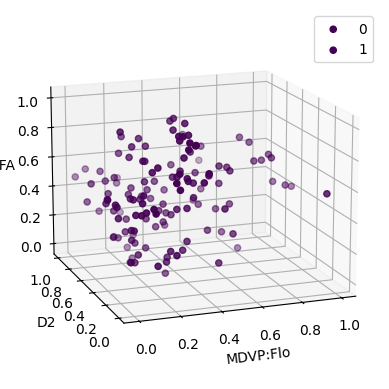

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

CLASSES = list(set(D[CLS]))

for i in CLASSES:
    df_k = D[D[CLS] == i]
    print(i, len(df_k))
    ax.scatter(df_k[FEATS[0]], df_k[FEATS[1]], df_k[FEATS[2]], c=[i for _ in range(len(df_k))], marker="o", label=i)


ax.set_xlabel(FEATS[0])
ax.set_ylabel(FEATS[1])
ax.set_zlabel(FEATS[2])

ax.legend()

ax.view_init(15, -110)

plt.show()

## 6. Регрессия

In [21]:
# test-train split
from sklearn.model_selection import train_test_split

X = D[FEATS]
y = D[CLS]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train

,MDVP:Flo,D2,DFA
128,0.327532,0.428267,0.377342
22,0.101779,0.859185,0.278348
124,0.107410,0.136138,0.519406
26,0.075069,0.619594,0.482171
11,0.155874,0.658253,0.837426
...,...,...,...
20,0.002291,0.729479,0.398676
133,0.332175,0.213135,0.492987
85,0.674077,0.992122,0.516062
177,0.482111,0.517086,0.606409


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

search_poly_log = GridSearchCV(
    Pipeline([
        ("poly", PolynomialFeatures()),
        ("linear", LinearRegression())
    ]),
    {
        "poly__degree": [2, 3, 4, 5],
    },
)

search_poly_log.fit(X_train, y_train)

search_poly_log.score(X_test, y_test)

0.03544119682035607

In [23]:
from sklearn.linear_model import ElasticNet
elastic_net = GridSearchCV(
    Pipeline([
        ("net", ElasticNet())
    ]),
    {
        "net__alpha": list(np.arange(0.5, 1.5, 0.01)),
        # 0 <= l1 <= 1 see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
        "net__l1_ratio": list(np.arange(0.5, 1, 0.01)),
    },
)

elastic_net.fit(X_train, y_train)
elastic_net.score(X_test, y_test)

-0.057454890788223745

In [24]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = GridSearchCV(
    Pipeline([
        ("neighbors", KNeighborsRegressor())
    ]),
    {
        "neighbors__n_neighbors": [1, 2, 3, 4, 5],
    },
)

neighbors.fit(X_train, y_train)
neighbors.score(X_test, y_test)

0.28018162393162416

## 7. Визуализация регрессии

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
polylog_mape = mean_absolute_percentage_error(search_poly_log.predict(X_test), y_test)
elasticnet_mape = mean_absolute_percentage_error(elastic_net.predict(X_test), y_test)
neighbors_mape = mean_absolute_percentage_error(neighbors.predict(X_test), y_test)

print("MAPE for polynomial regression:", polylog_mape)
print("MAPE for elastic net regression:", elasticnet_mape)
print("MAPE for k neighbors:", neighbors_mape)

best_pred = search_poly_log
if elasticnet_mape < best_pred.score(X_test, y_test):
    best_pred = elastic_net

if neighbors_mape < best_pred.score(X_test, y_test):
    best_pred = neighbors

print(best_pred)

MAPE for polynomial regression: 0.4398885295846516
MAPE for elastic net regression: 0.3906902086677368
MAPE for k neighbors: 0.45714285714285713
GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5]})


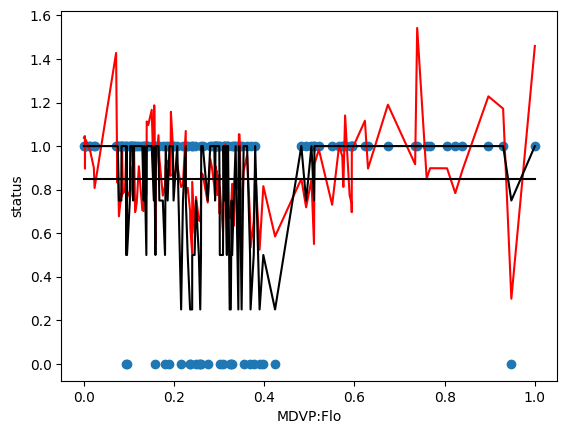

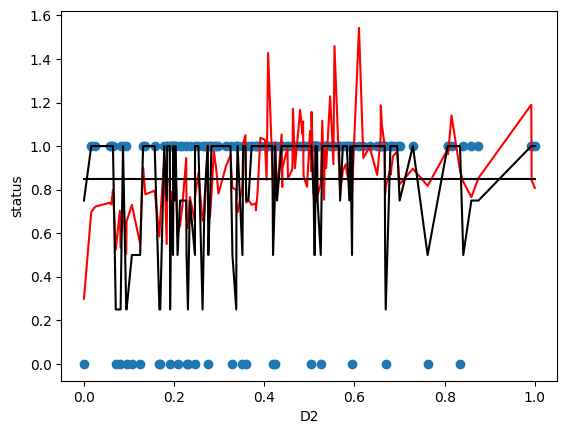

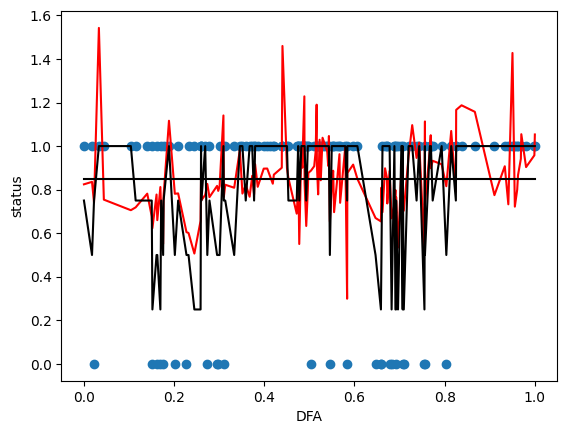

In [26]:
for i in FEATS:
    ax = plt.axes()
    ax.scatter(X[i], y)
    ax.set_xlabel(i)
    ax.set_ylabel("status")
    sorted_x = X.sort_values(i)
    for pred in [search_poly_log, elastic_net, neighbors]:
        ax.plot(sorted_x[i], pred.predict(sorted_x), color="red" if pred == best_pred else "black")
    plt.show()

## 8. Кривые обучения

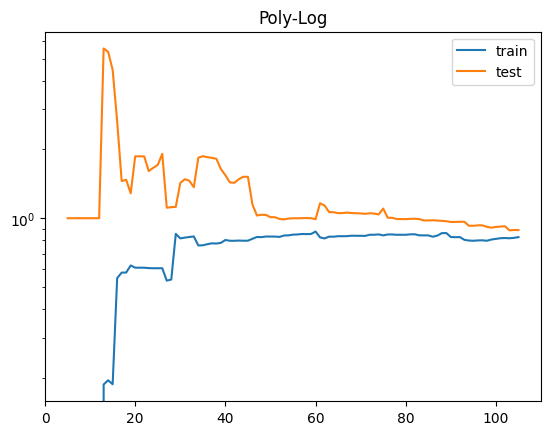

In [27]:
from sklearn.metrics import max_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    ax = plt.subplot()
    train_score = []
    test_score = []
    # k neighbors breaks when sample is lower that number of neighbors,
    # so start from the maximum number of neighbors
    start = 5
    for i in range(start, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(max_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(max_error(y_test, y_test_predict))
        
    ax.set_yscale("log")
    ax.plot([i for i in range(start, len(X_train)+1)], train_score, label="train")
    ax.plot([i for i in range(start, len(X_train)+1)], test_score, label="test")
    ax.legend()
plt.title("Poly-Log")
plot_learning_curve(search_poly_log.best_estimator_, X_train, X_test, y_train, y_test)

/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

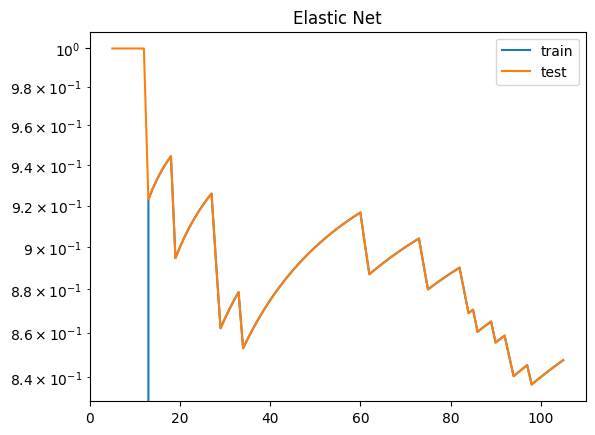

In [28]:
plt.title("Elastic Net")
plot_learning_curve(elastic_net.best_estimator_, X_train, X_test, y_train, y_test)

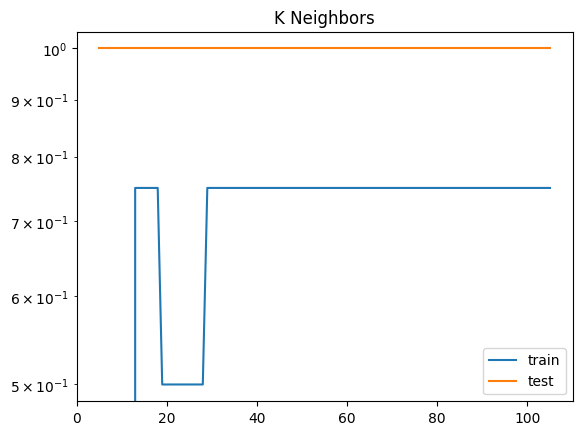

In [29]:
plt.title("K Neighbors")
plot_learning_curve(neighbors.best_estimator_, X_train, X_test, y_train, y_test)